# Logistic Regression for multi-class problem

In [1]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility
from utility import plot_confusion_matrix,plot_decision_regions

In [2]:
import pandas as pd
print(pd.__version__)
import sklearn
print(sklearn.__version__)  #conda update scikit-learn

2.2.2
1.5.1


## 載入Iris資料集

In [3]:
# 加載數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print(f'feature_names: {iris['feature_names']}')
print(f'target_names: {iris['target_names']}')

y = pd.DataFrame(iris['target'], columns=['target']) #不篩選0,1，選擇多類別

# 合併數據集
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

600
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


## 分割資料集

In [4]:
from sklearn.model_selection import train_test_split

# 分割數據集，只使用 sepal length 和 petal length 兩個特徵
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

In [5]:
y_train.shape

(105,)

In [6]:
type(y_test)

pandas.core.series.Series

##  Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

# 標準化數據
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 將標準化後的數據轉換回 DataFrame 以保留特徵名稱
X_train_std_df = pd.DataFrame(X_train_std, columns=['sepal length (cm)', 'petal length (cm)'])
X_test_std_df = pd.DataFrame(X_test_std, columns=['sepal length (cm)', 'petal length (cm)'])

In [8]:
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 訓練邏輯回歸模型

In [9]:
from sklearn.linear_model import LogisticRegression

# 訓練邏輯回歸模型
lr = LogisticRegression(solver='lbfgs') # 自動選用多類別
lr.fit(X_train_std_df, y_train)

# 計算準確率
print('training accuracy:', lr.score(X_train_std_df, y_train))
print('test accuracy:', lr.score(X_test_std_df, y_test))

training accuracy: 0.9619047619047619
test accuracy: 0.9555555555555556


In [10]:
X_test[:2]

,sepal length (cm),petal length (cm)
114,5.8,5.1
62,6.0,4.0


## 比較測試集的預測及真實答案

In [11]:
# 使用測試集進行預測
pred_test = lr.predict(X_test_std_df)
print(pred_test)

[2 1 0 2 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [12]:
# ground truth
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [13]:
len(y_test.values)

45

In [14]:
error_index=np.where(pred_test!=y_test.values)[0]
error_index

array([ 8, 37], dtype=int64)

In [15]:
#找出8與37筆資料的原始位置
print(X_test.index[8], X_test.index[37])

76 83


In [16]:
# 找出預測錯誤的索引
error_index = np.where(pred_test!= y_test.values)[0]

# 計算準確率
accuracy_test = 1 - len(error_index) / len(X_test)
print('accuracy_test:', accuracy_test)

# 顯示錯誤的索引
print('error_index:', error_index)
# 顯示錯誤的預測結果
print('miss classification :', pred_test[error_index])

# 找出錯誤預測的原始資料索引
data_index = X_test.iloc[error_index].index
# 顯示錯誤預測的原始資料
iris_data.iloc[data_index]

accuracy_test: 0.9555555555555556
error_index: [ 8 37]
miss classification : [2 2]


,sepal length (cm),petal length (cm),target
76,6.8,4.8,1
83,6.0,5.1,1


In [17]:
# 顯示錯誤預測的原始資料
iris_data.iloc[data_index]

,sepal length (cm),petal length (cm),target
76,6.8,4.8,1
83,6.0,5.1,1


## 比較訓練集的預測及真實答案

In [18]:
# 使用訓練集進行預測
pred_train = lr.predict(X_train_std_df)
print(pred_train)

# 找出訓練集預測錯誤的索引
error_index = np.where(pred_train!= y_train.values)[0]

# 計算準確率
accuracy_train = 1 - len(error_index) / len(X_train)
print('accuracy_train:', accuracy_train)

# 顯示錯誤的索引
print('error_index:', error_index)
# 顯示錯誤的預測結果
print('miss classification :', pred_train[error_index])

# 找出錯誤預測的原始資料索引
data_index = X_train.iloc[error_index].index
# 顯示錯誤預測的原始資料
iris_data.iloc[data_index]

[1 2 2 2 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 2 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 2 2 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
accuracy_train: 0.9619047619047619
error_index: [11 29 87 88]
miss classification : [1 2 2 2]


,sepal length (cm),petal length (cm),target
106,4.9,4.5,2
52,6.9,4.9,1
72,6.3,4.9,1
77,6.7,5.0,1


## decision_regions for test data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定義畫決策邊界的函數
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, target_names=None):
    # 設置標記生成器和顏色地圖
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 繪製決策邊界
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 繪製樣本點
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=target_names[cl] if target_names is not None else cl)

    # 突出顯示測試集數據點
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='yellow',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='*',
                    s=100, 
                    label='test set')

# 加載數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])  # 不篩選0,1，選擇多類別

iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]

# 分割數據集，只使用 sepal length 和 petal length 兩個特徵
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

# 標準化數據
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 訓練邏輯回歸模型
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_std, y_train)

LogisticRegression()

In [20]:
print(f'target_names: {iris['target_names']}')

target_names: ['setosa' 'versicolor' 'virginica']


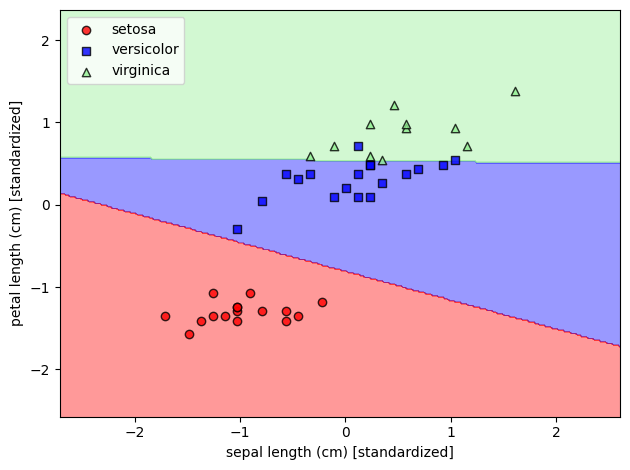

In [21]:
# 繪製測試集的決策邊界
plot_decision_regions(X_test_std, y_test.values, classifier=lr, target_names=iris['target_names'])
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal length (cm) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## decision_regions for training data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定義畫決策邊界的函數
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, target_names=None):
    # 設置標記生成器和顏色地圖
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 繪製決策邊界
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 繪製樣本點
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=target_names[cl] if target_names is not None else cl)

    # 突出顯示測試集數據點
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='yellow',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='*',
                    s=100, 
                    label='test set')

# 加載數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])  # 不篩選0,1，選擇多類別

iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]

# 分割數據集，只使用 sepal length 和 petal length 兩個特徵
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

# 標準化數據
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 訓練邏輯回歸模型
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_std, y_train)

LogisticRegression()

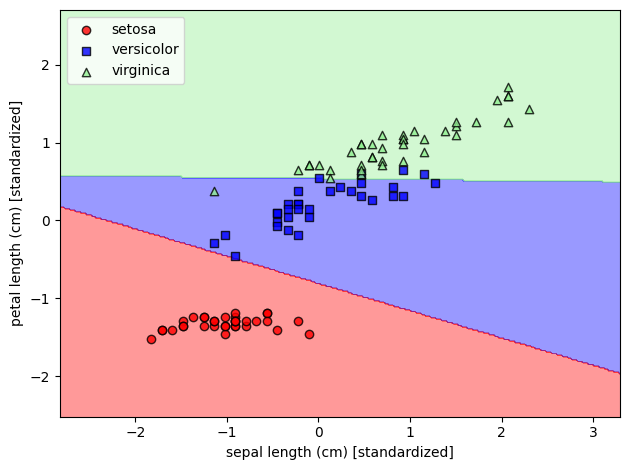

In [23]:
# 繪製訓練集的決策邊界
plot_decision_regions(X_train_std, y_train.values, classifier=lr, target_names=iris['target_names'])
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal length (cm) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()